### Problem Statement

Digital marketers often struggle to identify which customers are most likely to engage with online ads 
(clicks, conversions, or purchases). Predicting ad engagement can help companies optimize ad spend, 
personalize campaigns, and increase ROI.

Build an ML model that predicts whether a user will engage (click/purchase) with a digital ad based on 
historical ad campaign data and user behavior.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

### Data Gathering

In [2]:
ad = pd.read_csv('digital_marketing_roi_dataset.csv')
ad.head(10)

Campaign_ID        Spend  Impressions  Clicks  Conversions Campaign_Type  \
0         6065  1267.852332      17642.0  3262.0        118.0       Display   
1        17215  3503.649208      15837.0   297.0        223.0         Email   
2         9542  1795.152638      98219.0  1023.0        429.0       Display   
3        15636   227.683641      12849.0  3397.0        112.0      Meta Ads   
4        18487  1005.997237      66945.0  4202.0         44.0      LinkedIn   
5        18021  2432.282246      30374.0  1800.0        383.0       Display   
6        18936  3828.770466      85066.0  4765.0         96.0       Display   
7        12368  1841.702372      72164.0  4693.0        166.0      LinkedIn   
8         5012  3562.360232      33165.0     NaN        392.0         Email   
9        11527   641.838017      28664.0   787.0         50.0         Email   

      Region Device_Type  Month       CTR  Conversion_Rate        CPC  \
0     Canada     Desktop      5  0.184900         0.036174   0.388673   
1      India     Desktop     11  0.018754         0.750842  11.796799   
2      India      Mobile      2  0.010416         0.419355   1.754792   
3         UK      Mobile      9  0.264379         0.032970   0.067025   
4     Canada      Tablet      2  0.062768         0.010471   0.239409   
5         UK     Desktop      1  0.059261         0.212778   1.351268   
6      India      Mobile      1  0.056015         0.020147   0.803520   
7     Canada      Tablet      9  0.065032         0.035372   0.392436   
8  Australia      Tablet      9  0.060455         0.195511   1.776738   
9      India     Desktop      2  0.027456         0.063532   0.815550   

          CPM        CPA       Revenue        ROI  
0   71.865567  10.744511  16442.912417  11.969107  
1  221.231875  15.711431  36318.018142   9.365769  
2   18.277040   4.184505  54813.630280  29.534245  
3   17.719950   2.032890   8605.263792  36.794827  
4   15.027220  22.863573   5996.434087   4.960686  
5   80.077772   6.350606  64903.903188  25.684363  
6   45.009410  39.883025   6406.041477   0.673133  
7   25.521068  11.094593   9913.631923   4.382863  
8  107.413244   9.087654  43488.892107  11.207887  
9   22.391781  12.836760   9899.958071  14.424387

In [3]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20100 entries, 0 to 20099
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Campaign_ID      20100 non-null  int64  
 1   Spend            19900 non-null  float64
 2   Impressions      19899 non-null  float64
 3   Clicks           19900 non-null  float64
 4   Conversions      19900 non-null  float64
 5   Campaign_Type    20100 non-null  object 
 6   Region           20100 non-null  object 
 7   Device_Type      20100 non-null  object 
 8   Month            20100 non-null  int64  
 9   CTR              20100 non-null  float64
 10  Conversion_Rate  20100 non-null  float64
 11  CPC              20100 non-null  float64
 12  CPM              20100 non-null  float64
 13  CPA              20100 non-null  float64
 14  Revenue          19899 non-null  float64
 15  ROI              20100 non-null  float64
dtypes: float64(11), int64(2), object(3)
memory usage: 2.5+ MB


### Train Test Split

In [4]:
#first split of whole data
train_data, test_data = train_test_split(ad, test_size=0.2, random_state= 42) 

x = train_data.drop("CTR", axis=1)
y = train_data["CTR"]
#split train_data again into train and test
x_train, x_test, y_train, y_test  = train_test_split(x, y, test_size=0.2, random_state= 42)


In [5]:
x_train.head()

Campaign_ID        Spend  Impressions  Clicks  Conversions  \
100           2208  4305.874216      35096.0  4040.0        200.0   
6212          9704  4020.266599      88426.0  4025.0        382.0   
16404         8872   756.476847      63570.0  3976.0         78.0   
8907          9242  3507.893450       4411.0  3291.0        362.0   
14848         5542  3282.824433      35134.0  4686.0        386.0   

       Campaign_Type  Region Device_Type  Month  Conversion_Rate       CPC  \
100    Google Search  Canada      Tablet      9         0.049505  1.065810   
6212           Email      US      Mobile      8         0.094907  0.998824   
16404          Email   India      Mobile      8         0.019618  0.190261   
8907        Meta Ads      UK     Desktop     11         0.109997  1.065905   
14848       Meta Ads   India      Mobile      1         0.082373  0.700560   

              CPM        CPA       Revenue        ROI  
100    122.688461  21.529371  26845.133143   5.234537  
6212    45.464757  10.524258  27277.566707   5.785014  
16404   11.899903   9.698421  14861.414938  18.645565  
8907   795.260360   9.690313  23021.042014   5.562640  
14848   93.437253   8.504726  52829.757758  15.092776

In [6]:
y_train.head()

100      0.115113
6212     0.045518
16404    0.062545
8907     0.746089
14848    0.133375
Name: CTR, dtype: float64

## EDA(Exploratory Data Analysis)

In [7]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12864 entries, 100 to 3515
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Campaign_ID      12864 non-null  int64  
 1   Spend            12738 non-null  float64
 2   Impressions      12730 non-null  float64
 3   Clicks           12732 non-null  float64
 4   Conversions      12739 non-null  float64
 5   Campaign_Type    12864 non-null  object 
 6   Region           12864 non-null  object 
 7   Device_Type      12864 non-null  object 
 8   Month            12864 non-null  int64  
 9   Conversion_Rate  12864 non-null  float64
 10  CPC              12864 non-null  float64
 11  CPM              12864 non-null  float64
 12  CPA              12864 non-null  float64
 13  Revenue          12738 non-null  float64
 14  ROI              12864 non-null  float64
dtypes: float64(10), int64(2), object(3)
memory usage: 1.6+ MB


In [8]:
x_train.duplicated().sum()

np.int64(50)

In [9]:
x_train.isna().sum()

Campaign_ID          0
Spend              126
Impressions        134
Clicks             132
Conversions        125
Campaign_Type        0
Region               0
Device_Type          0
Month                0
Conversion_Rate      0
CPC                  0
CPM                  0
CPA                  0
Revenue            126
ROI                  0
dtype: int64

In [10]:
#if data contain nan value then fill with KNN imputer

col_names = ["Spend", "Impressions", "Clicks", "Conversions", "Revenue"]
imputer = KNNImputer(n_neighbors=5)
x_train[col_names] = imputer.fit_transform(x_train[col_names])

In [11]:
x_train.isna().sum()

Campaign_ID        0
Spend              0
Impressions        0
Clicks             0
Conversions        0
Campaign_Type      0
Region             0
Device_Type        0
Month              0
Conversion_Rate    0
CPC                0
CPM                0
CPA                0
Revenue            0
ROI                0
dtype: int64

In [12]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3216 entries, 10316 to 19182
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Campaign_ID      3216 non-null   int64  
 1   Spend            3175 non-null   float64
 2   Impressions      3185 non-null   float64
 3   Clicks           3180 non-null   float64
 4   Conversions      3181 non-null   float64
 5   Campaign_Type    3216 non-null   object 
 6   Region           3216 non-null   object 
 7   Device_Type      3216 non-null   object 
 8   Month            3216 non-null   int64  
 9   Conversion_Rate  3216 non-null   float64
 10  CPC              3216 non-null   float64
 11  CPM              3216 non-null   float64
 12  CPA              3216 non-null   float64
 13  Revenue          3184 non-null   float64
 14  ROI              3216 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 402.0+ KB


In [13]:
x_test.isna().sum()

Campaign_ID         0
Spend              41
Impressions        31
Clicks             36
Conversions        35
Campaign_Type       0
Region              0
Device_Type         0
Month               0
Conversion_Rate     0
CPC                 0
CPM                 0
CPA                 0
Revenue            32
ROI                 0
dtype: int64

In [14]:
col_names = ["Spend", "Impressions", "Clicks", "Conversions", "Revenue"]
imputer = KNNImputer(n_neighbors= 5)
x_test[col_names] = imputer.fit_transform(x_test[col_names])

In [15]:
x_test.isna().sum()

Campaign_ID        0
Spend              0
Impressions        0
Clicks             0
Conversions        0
Campaign_Type      0
Region             0
Device_Type        0
Month              0
Conversion_Rate    0
CPC                0
CPM                0
CPA                0
Revenue            0
ROI                0
dtype: int64

### 1. Campaign_ID

In [16]:
x_train.drop(columns = ["Campaign_ID"], inplace = True)

In [17]:
x_train.columns

Index(['Spend', 'Impressions', 'Clicks', 'Conversions', 'Campaign_Type',
       'Region', 'Device_Type', 'Month', 'Conversion_Rate', 'CPC', 'CPM',
       'CPA', 'Revenue', 'ROI'],
      dtype='object')

In [18]:
x_test.drop(columns=["Campaign_ID"], inplace = True)

### 2. Spend

In [19]:
x_train['Spend'].info()

<class 'pandas.core.series.Series'>
Index: 12864 entries, 100 to 3515
Series name: Spend
Non-Null Count  Dtype  
--------------  -----  
12864 non-null  float64
dtypes: float64(1)
memory usage: 201.0 KB


In [20]:
x_train['Spend'].duplicated().sum()

np.int64(50)

<Axes: ylabel='Spend'>

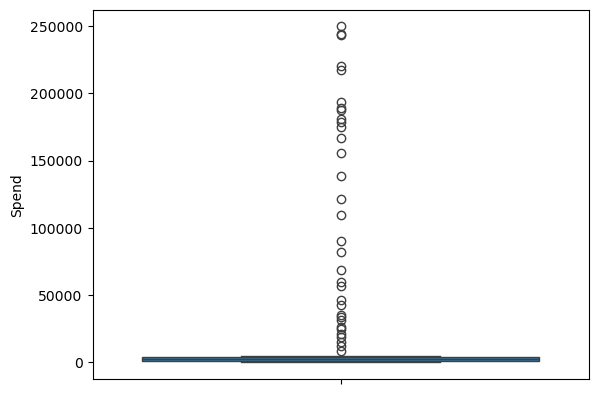

In [21]:
sns.boxplot(x_train['Spend'])

In [22]:
def impute_outliers(feature):
    q1 = feature.quantile(0.25)
    q3 = feature.quantile(0.75)
    iqr = q3-q1

    upper_tail = q3 + 1.5 * iqr
    lower_tail = q1 - 1.5 * iqr

    feature = feature.clip(lower = lower_tail, upper = upper_tail)
    return feature

x_train["Spend"] = impute_outliers(x_train["Spend"])

<Axes: ylabel='Spend'>

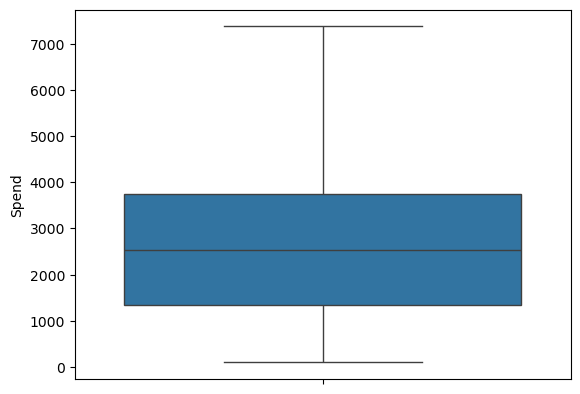

In [23]:
sns.boxplot(x_train["Spend"])

<Axes: xlabel='Spend', ylabel='Density'>

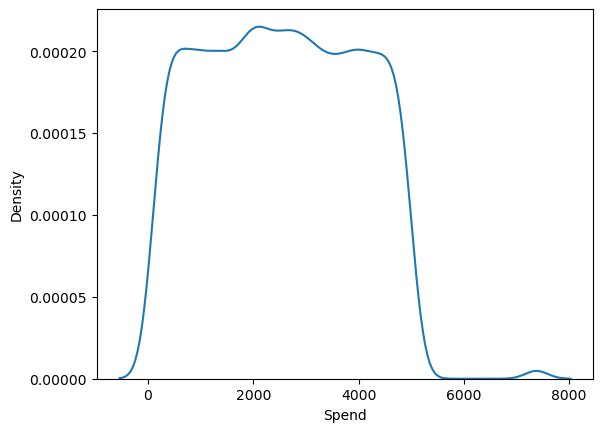

In [24]:
sns.kdeplot(x_train["Spend"])

In [25]:
x_test["Spend"]

10316    4811.564242
3460     3307.159118
10048    1324.350580
2975      747.836462
612      4542.677192
            ...     
7192     4817.564916
9505     4582.726534
11109    4073.020635
15856    4564.317145
19182    3328.618852
Name: Spend, Length: 3216, dtype: float64

In [26]:
sns.boxplot(x_test["Spend"])

<Axes: ylabel='Spend'>

<Axes: xlabel='Spend', ylabel='Density'>

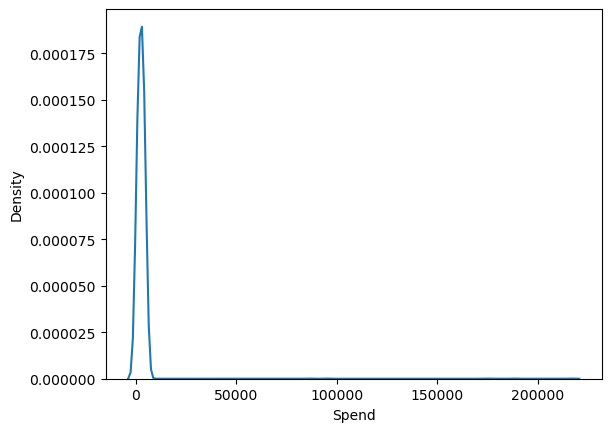

In [27]:
sns.kdeplot(x_test["Spend"])

In [28]:
x_test["Spend"] = impute_outliers(x_test["Spend"])

<Axes: ylabel='Spend'>

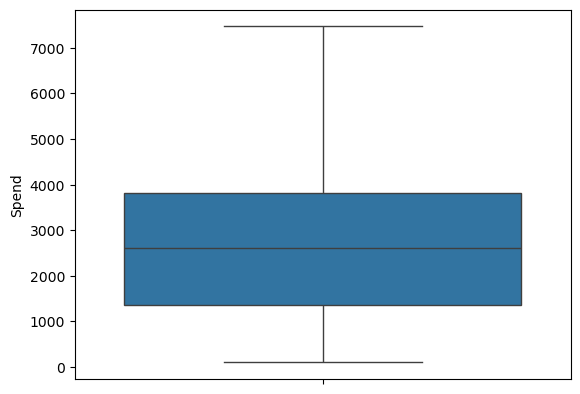

In [29]:
sns.boxplot(x_test["Spend"])

### 3. Impressions

In [30]:
x_train['Impressions']

100      35096.0
6212     88426.0
16404    63570.0
8907      4411.0
14848    35134.0
          ...   
7718     88178.0
19828    21398.0
19234    35073.0
3444     18013.0
3515     13631.0
Name: Impressions, Length: 12864, dtype: float64

In [31]:
sns.boxplot(x_train['Impressions'])

<Axes: ylabel='Impressions'>

In [32]:
sns.boxplot(x_test['Impressions'])

<Axes: ylabel='Impressions'>

### 4. Clicks

In [33]:
x_train["Clicks"]

100      4040.0
6212     4025.0
16404    3976.0
8907     3291.0
14848    4686.0
          ...  
7718     3505.0
19828    1359.0
19234    2497.0
3444     1144.0
3515     1185.0
Name: Clicks, Length: 12864, dtype: float64

<Axes: ylabel='Clicks'>

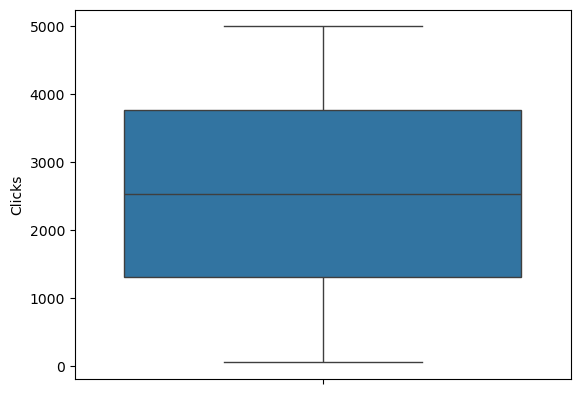

In [34]:
sns.boxplot(x_train["Clicks"])

In [35]:
sns.kdeplot(x_train["Clicks"])

<Axes: xlabel='Clicks', ylabel='Density'>

### 5. Conversions

In [36]:
x_train['Conversions']

100      200.0
6212     382.0
16404     78.0
8907     362.0
14848    386.0
         ...  
7718      53.0
19828     55.0
19234    149.0
3444     279.0
3515     127.0
Name: Conversions, Length: 12864, dtype: float64

<Axes: xlabel='Conversions', ylabel='Density'>

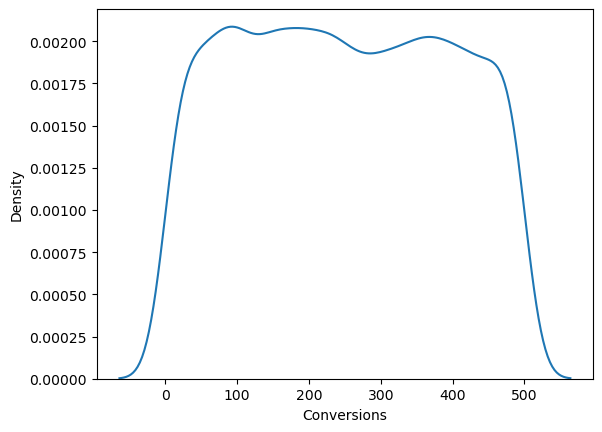

In [37]:
sns.kdeplot(x_train['Conversions'])

<Axes: ylabel='Conversions'>

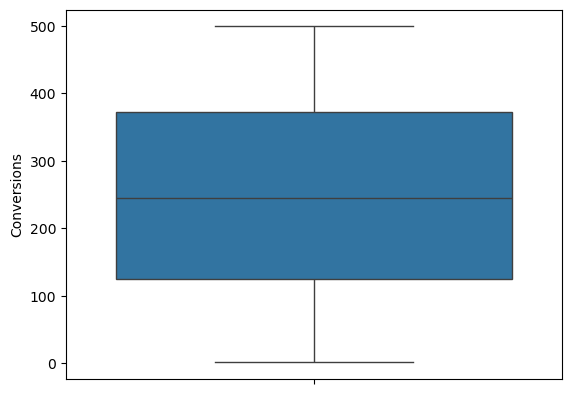

In [38]:
sns.boxplot(x_train['Conversions'])

### 6. Campaign_Type

In [39]:
x_train['Campaign_Type']

100      Google Search
6212             Email
16404            Email
8907          Meta Ads
14848         Meta Ads
             ...      
7718     Google Search
19828         Meta Ads
19234    Google Search
3444          Meta Ads
3515          LinkedIn
Name: Campaign_Type, Length: 12864, dtype: object

In [40]:
x_train['Campaign_Type'].value_counts()

Campaign_Type
Google Search    2625
Display          2620
Meta Ads         2574
LinkedIn         2570
Email            2475
Name: count, dtype: int64

In [41]:
#converting it by using Frequency / Count Encoding

x_train['Campaign_Type'] = x_train['Campaign_Type'].map({
    "Google Search" : 1,
    "Display" : 2,
    "Meta Ads" : 3,
    "LinkedIn" : 4,
    "Email": 5
    
})

In [42]:
x_train['Campaign_Type'].value_counts()

Campaign_Type
1    2625
2    2620
3    2574
4    2570
5    2475
Name: count, dtype: int64

In [43]:
x_test['Campaign_Type'] = x_test['Campaign_Type'].map({
    "Google Search" : 1,
    "Display" : 2,
    "Meta Ads" : 3,
    "LinkedIn" : 4,
    "Email": 5
    
})

In [44]:
x_test['Campaign_Type'].value_counts()

Campaign_Type
1    661
5    653
3    644
4    634
2    624
Name: count, dtype: int64

### 7. Device_Type

In [45]:
x_train['Device_Type']

100       Tablet
6212      Mobile
16404     Mobile
8907     Desktop
14848     Mobile
          ...   
7718      Mobile
19828    Desktop
19234     Tablet
3444      Mobile
3515      Mobile
Name: Device_Type, Length: 12864, dtype: object

In [46]:
x_train['Device_Type'].value_counts()

Device_Type
Mobile     4350
Desktop    4269
Tablet     4245
Name: count, dtype: int64

In [47]:
x_train['Device_Type'] = x_train['Device_Type'].map({
    "Mobile" : 1,
    "Desktop" : 2,
    "Tablet" : 3
})

In [48]:
x_train['Device_Type'].value_counts()

Device_Type
1    4350
2    4269
3    4245
Name: count, dtype: int64

In [49]:
x_test['Device_Type'] = x_test['Device_Type'].map({
    "Mobile" : 1,
    "Desktop" : 2,
    "Tablet" : 3
})

In [50]:
x_test['Device_Type'].value_counts()

Device_Type
3    1104
2    1087
1    1025
Name: count, dtype: int64

### 8. Month

In [51]:
x_train['Month']

100       9
6212      8
16404     8
8907     11
14848     1
         ..
7718      5
19828     6
19234     2
3444     11
3515     12
Name: Month, Length: 12864, dtype: int64

In [52]:
x_train['Month'].value_counts()

Month
10    1124
8     1107
5     1090
2     1085
12    1075
11    1073
4     1070
1     1068
7     1062
6     1059
9     1040
3     1011
Name: count, dtype: int64

### 9. ROI

In [53]:
x_train['ROI']

100       5.234537
6212      5.785014
16404    18.645565
8907      5.562640
14848    15.092776
           ...    
7718     11.926882
19828    -0.236552
19234     2.237161
3444      8.798104
3515      0.968928
Name: ROI, Length: 12864, dtype: float64

<Axes: ylabel='ROI'>

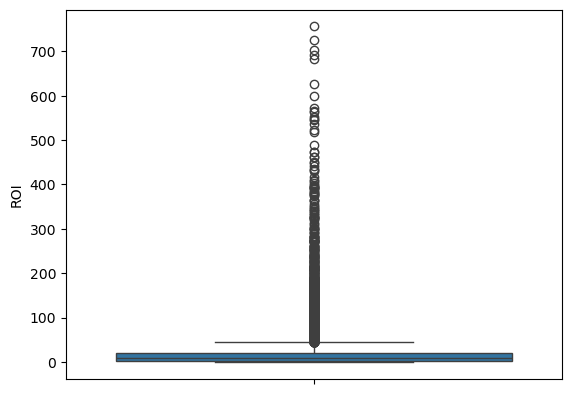

In [54]:
sns.boxplot(x_train['ROI'])

In [55]:
x_train['ROI'] = impute_outliers(x_train['ROI'])

<Axes: ylabel='ROI'>

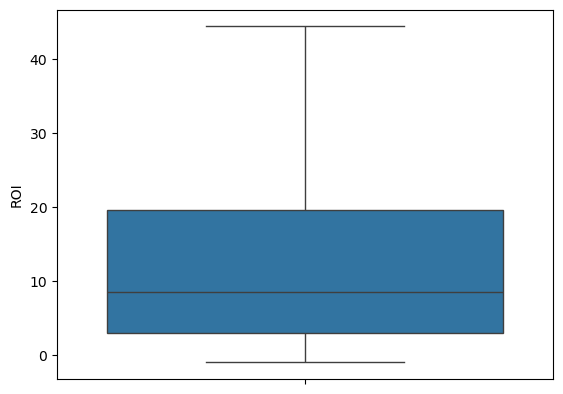

In [56]:
sns.boxplot(x_train['ROI'])

In [57]:
x_test["ROI"]

10316    12.685827
3460     12.785443
10048     1.253722
2975     60.134157
612       3.613756
           ...    
7192      3.358717
9505      9.027216
11109     7.931371
15856    10.947409
19182     9.248479
Name: ROI, Length: 3216, dtype: float64

<Axes: ylabel='ROI'>

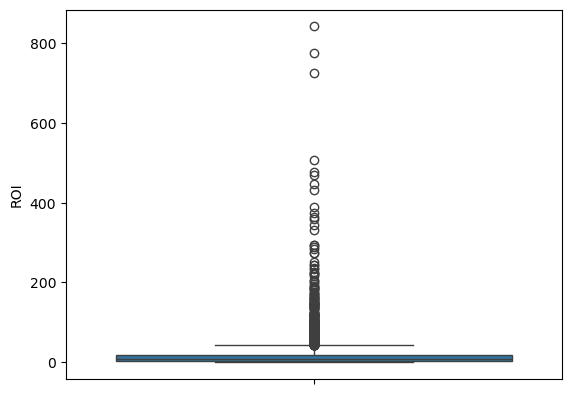

In [58]:
sns.boxplot(x_test["ROI"])

In [59]:
x_test["ROI"] = impute_outliers(x_test["ROI"])

<Axes: ylabel='ROI'>

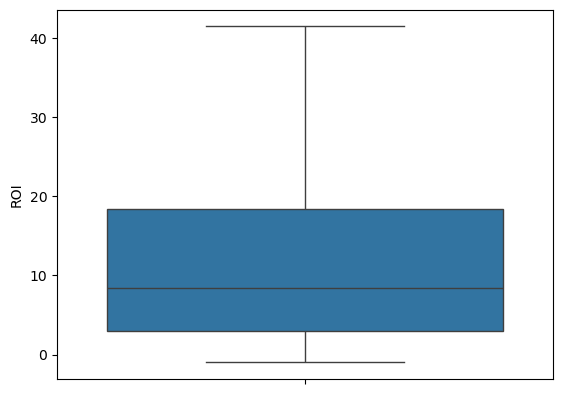

In [60]:
sns.boxplot(x_test["ROI"])

### 10. Conversion_Rate

In [61]:
x_train['Conversion_Rate']

100      0.049505
6212     0.094907
16404    0.019618
8907     0.109997
14848    0.082373
           ...   
7718     0.015121
19828    0.040471
19234    0.059672
3444     0.243881
3515     0.107173
Name: Conversion_Rate, Length: 12864, dtype: float64

<Axes: xlabel='Conversion_Rate', ylabel='Density'>

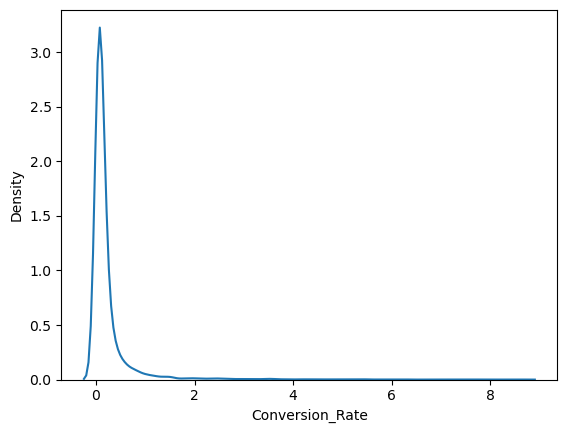

In [62]:
sns.kdeplot(x_train['Conversion_Rate'])

In [63]:
x_train['Conversion_Rate'] = impute_outliers(x_train['Conversion_Rate'])

<Axes: ylabel='Conversion_Rate'>

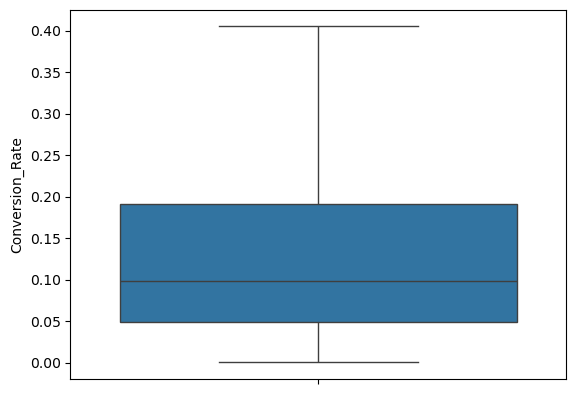

In [64]:
sns.boxplot(x_train['Conversion_Rate'])

In [65]:
x_test['Conversion_Rate']

10316    0.301504
3460     0.245556
10048    0.022667
2975     0.387779
612      3.477778
           ...   
7192     0.314307
9505     0.082619
11109    0.112049
15856    0.064701
19182    0.332707
Name: Conversion_Rate, Length: 3216, dtype: float64

<Axes: ylabel='Conversion_Rate'>

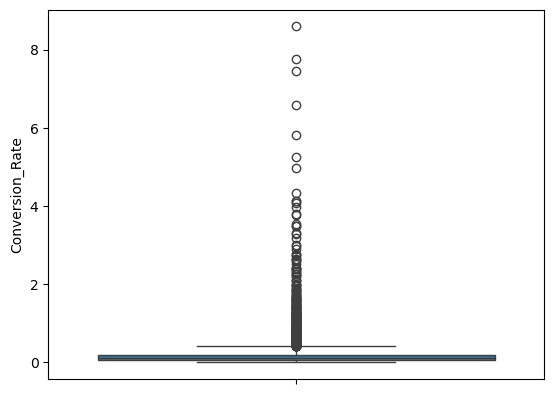

In [66]:
sns.boxplot(x_test['Conversion_Rate'])

In [67]:
x_test['Conversion_Rate'] = impute_outliers(x_test['Conversion_Rate'])

<Axes: ylabel='Conversion_Rate'>

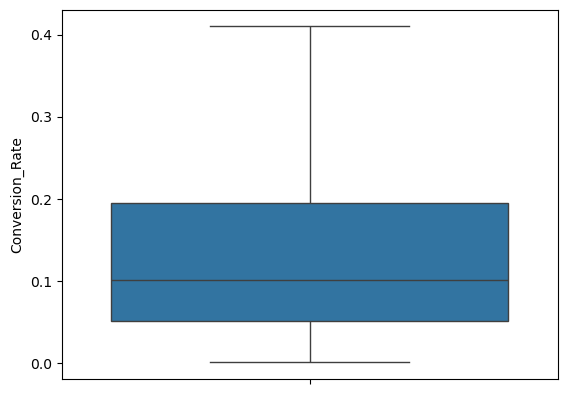

In [68]:
sns.boxplot(x_test['Conversion_Rate'])

### 11. CPC

In [69]:
x_train["CPC"]

100      1.065810
6212     0.998824
16404    0.190261
8907     1.065905
14848    0.700560
           ...   
7718     0.100837
19828    1.897331
19234    1.512130
3444     4.340496
3515     2.181091
Name: CPC, Length: 12864, dtype: float64

<Axes: ylabel='CPC'>

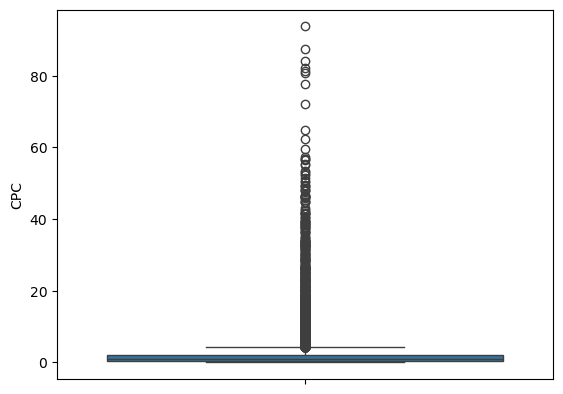

In [70]:
sns.boxplot(x_train["CPC"])

In [71]:
x_train["CPC"] = impute_outliers(x_train["CPC"])

<Axes: ylabel='CPC'>

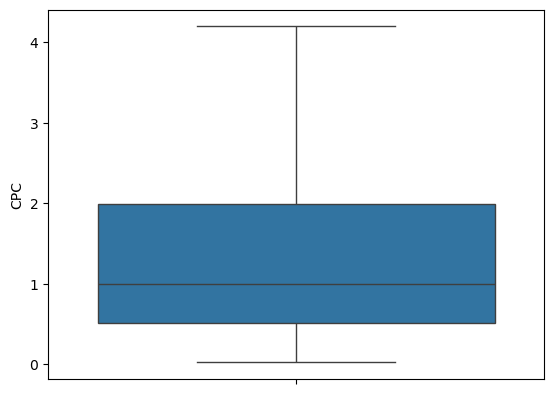

In [72]:
sns.boxplot(x_train["CPC"])

In [73]:
x_test['CPC']

10316     3.146870
3460      1.837311
10048     0.270441
2975      0.878774
612      50.474190
           ...    
7192      3.666336
9505      1.402303
11109     0.954763
15856     0.968247
19182     6.256802
Name: CPC, Length: 3216, dtype: float64

<Axes: ylabel='CPC'>

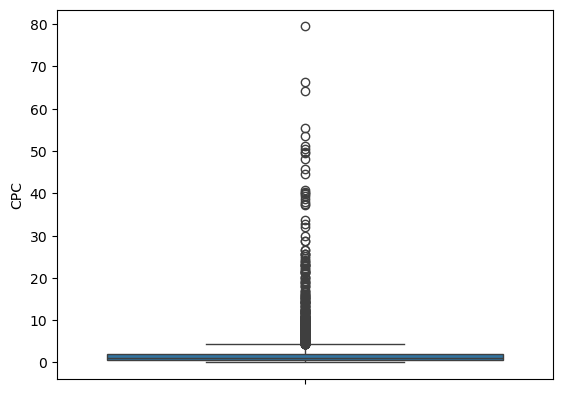

In [74]:
sns.boxplot(x_test['CPC'])

In [75]:
x_test['CPC'] = impute_outliers(x_test['CPC'])

<Axes: ylabel='CPC'>

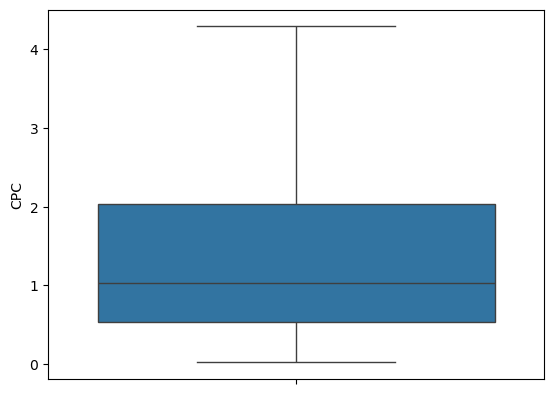

In [76]:
sns.boxplot(x_test['CPC'])

### 12. CPM

In [77]:
x_train['CPM']

100      122.688461
6212      45.464757
16404     11.899903
8907     795.260360
14848     93.437253
            ...    
7718       4.008169
19828    120.500624
19234    107.655122
3444     275.663549
3515     189.611347
Name: CPM, Length: 12864, dtype: float64

<Axes: ylabel='CPM'>

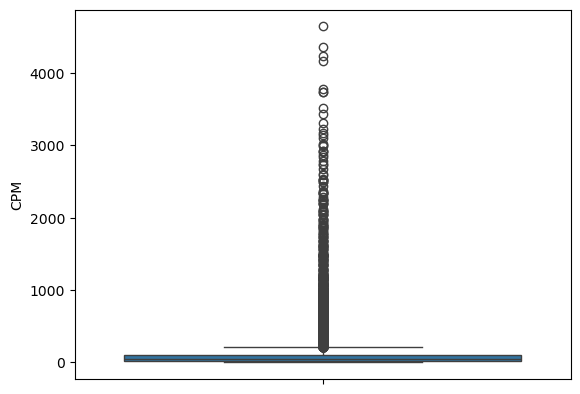

In [78]:
sns.boxplot(x_train['CPM'])

In [79]:
x_train['CPM'] = impute_outliers(x_train['CPM'])

In [80]:
sns.boxplot(x_train['CPM'])

<Axes: ylabel='CPM'>

In [81]:
x_test['CPM']

10316    2348.249995
3460      109.298669
10048      48.566159
2975        8.379120
612        86.122001
            ...     
7192      137.573960
9505      460.668128
11109     778.036415
15856     155.080088
19182      37.197922
Name: CPM, Length: 3216, dtype: float64

<Axes: ylabel='CPM'>

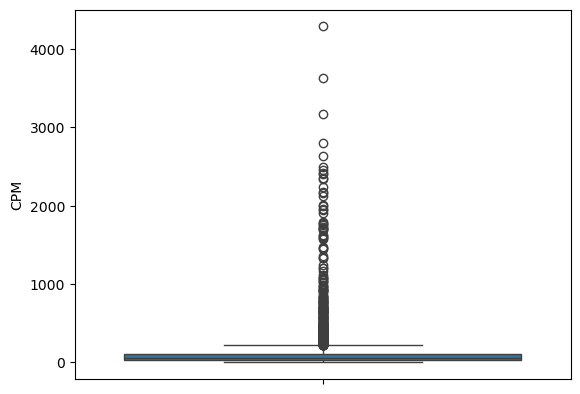

In [82]:
sns.boxplot(x_test['CPM'])

In [83]:
x_test['CPM'] = impute_outliers(x_test['CPM'])

In [84]:
sns.boxplot(x_test['CPM'])

<Axes: ylabel='CPM'>

### 13. CPA

In [85]:
x_train['CPA']

100      21.529371
6212     10.524258
16404     9.698421
8907      9.690313
14848     8.504726
           ...    
7718      6.668534
19828    46.881315
19234    25.340859
3444     17.797590
3515     20.351120
Name: CPA, Length: 12864, dtype: float64

<Axes: ylabel='CPA'>

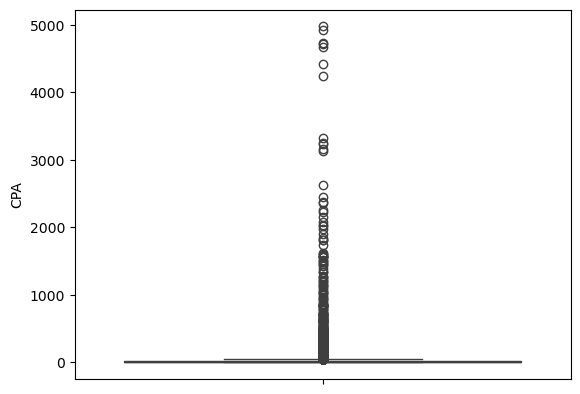

In [86]:
sns.boxplot(x_train['CPA'])

In [87]:
x_train['CPA'] = impute_outliers(x_train['CPA'])

<Axes: ylabel='CPA'>

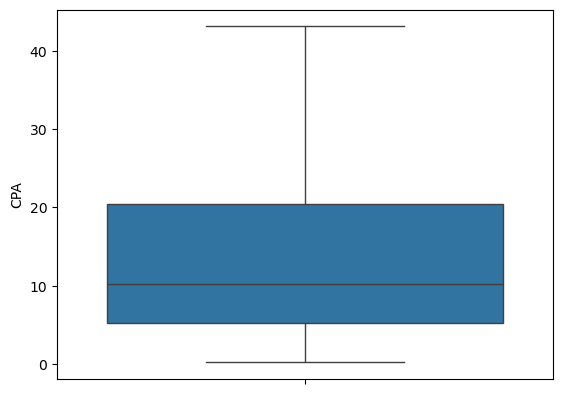

In [88]:
sns.boxplot(x_train['CPA'])

In [89]:
x_test['CPA']

10316    10.437233
3460      7.482260
10048    11.931086
2975      2.266171
612      14.513346
           ...    
7192     11.664806
9505     16.973061
11109     8.520964
15856    14.964974
19182    18.805756
Name: CPA, Length: 3216, dtype: float64

<Axes: ylabel='CPA'>

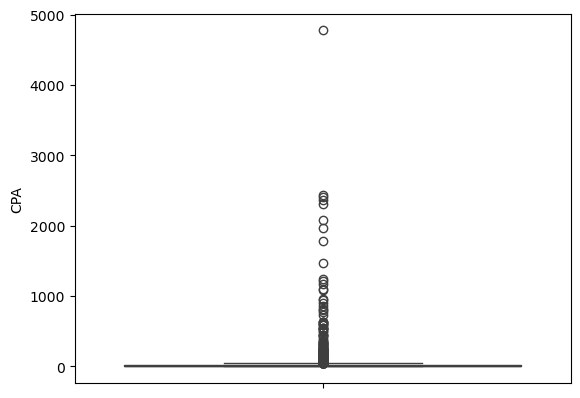

In [90]:
sns.boxplot(x_test['CPA'])

In [91]:
x_test['CPA'] = impute_outliers(x_test['CPA'])

<Axes: ylabel='CPA'>

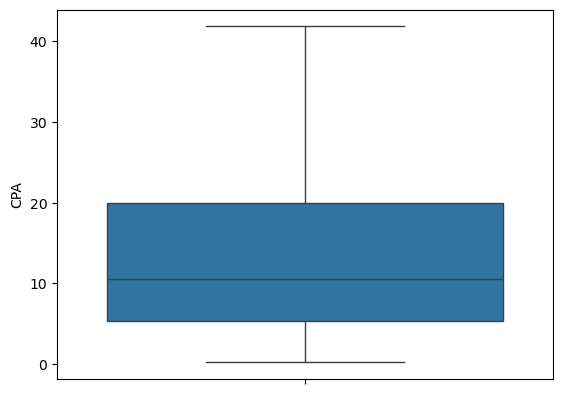

In [92]:
sns.boxplot(x_test['CPA'])

### 14. Revenue

In [93]:
x_train['Revenue']

100      26845.133143
6212     27277.566707
16404    14861.414938
8907     23021.042014
14848    52829.757758
             ...     
7718      4568.777821
19828     1968.529714
19234    12222.834477
3444     48652.754227
3515      5088.875476
Name: Revenue, Length: 12864, dtype: float64

<Axes: ylabel='Revenue'>

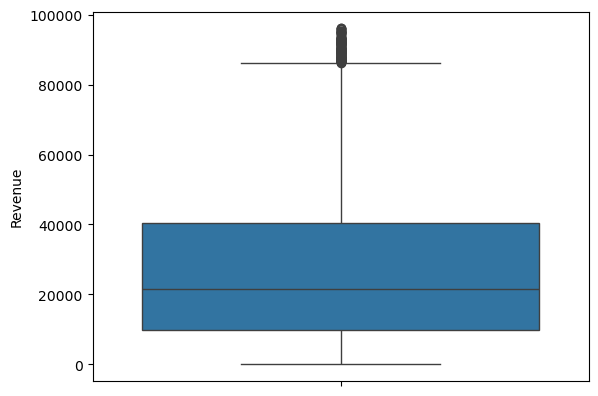

In [94]:
sns.boxplot(x_train['Revenue'])

In [95]:
x_train['Revenue'] = impute_outliers(x_train['Revenue'])

<Axes: ylabel='Revenue'>

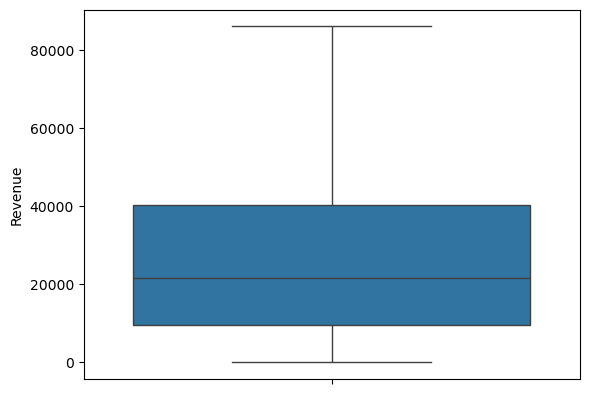

In [96]:
sns.boxplot(x_train['Revenue'])

In [97]:
x_test["Revenue"]

10316    65850.236953
3460     45590.651968
10048     2984.718185
2975     45718.351361
612      20958.804104
             ...     
7192     20998.402488
9505     45951.990593
11109    36377.658236
15856    54531.762701
19182    34113.281355
Name: Revenue, Length: 3216, dtype: float64

<Axes: ylabel='Revenue'>

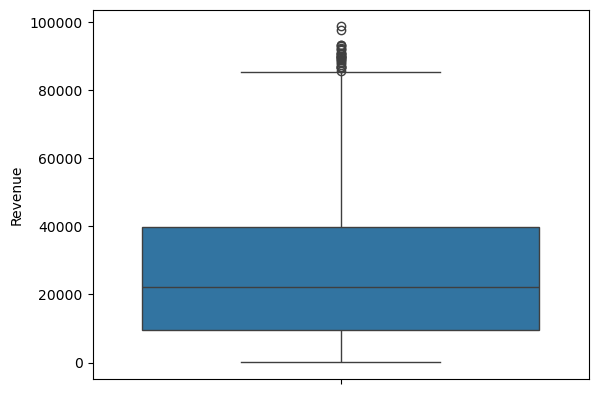

In [98]:
sns.boxplot(x_test["Revenue"])

In [99]:
x_test["Revenue"] = impute_outliers(x_test["Revenue"])

<Axes: ylabel='Revenue'>

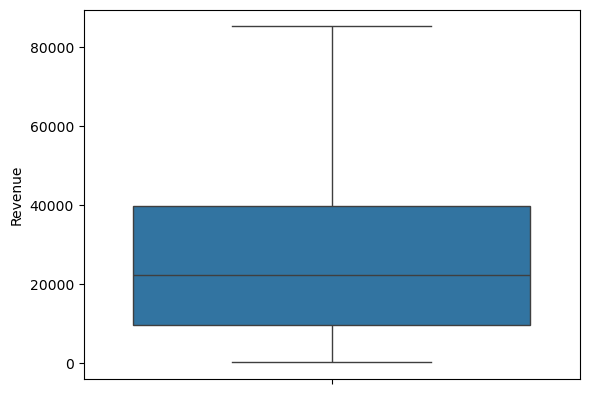

In [100]:
sns.boxplot(x_test["Revenue"])

### 15. Region

In [101]:
x_train['Region']

100         Canada
6212            US
16404        India
8907            UK
14848        India
           ...    
7718         India
19828    Australia
19234    Australia
3444            US
3515     Australia
Name: Region, Length: 12864, dtype: object

In [102]:
x_train['Region'].value_counts()

Region
Australia    2645
Canada       2601
India        2565
UK           2531
US           2522
Name: count, dtype: int64

In [103]:
x_train['Region'] = x_train['Region'].map({
    "Australia" : 1,
    "Canada" : 2,
    "India" : 3,
    "UK" : 4,
    "US" : 5
})

In [104]:
x_train['Region'] 

100      2
6212     5
16404    3
8907     4
14848    3
        ..
7718     3
19828    1
19234    1
3444     5
3515     1
Name: Region, Length: 12864, dtype: int64

In [105]:
x_test['Region'] = x_test['Region'].map({
    "Australia" : 1,
    "Canada" : 2,
    "India" : 3,
    "UK" : 4,
    "US" : 5
})

In [106]:
x_test['Region']

10316    3
3460     3
10048    1
2975     4
612      1
        ..
7192     4
9505     3
11109    2
15856    5
19182    5
Name: Region, Length: 3216, dtype: int64

### 16. y_train

In [107]:
y_train

100      0.115113
6212     0.045518
16404    0.062545
8907     0.746089
14848    0.133375
           ...   
7718     0.039749
19828    0.063511
19234    0.071194
3444     0.063510
3515     0.086934
Name: CTR, Length: 12864, dtype: float64

In [108]:
sns.boxplot(y_train)

<Axes: ylabel='CTR'>

In [109]:
y_test

10316    0.746218
3460     0.059488
10048    0.179581
2975     0.009535
612      0.001706
           ...   
7192     0.037524
9505     0.328508
11109    0.814900
15856    0.160166
19182    0.005945
Name: CTR, Length: 3216, dtype: float64

<Axes: ylabel='CTR'>

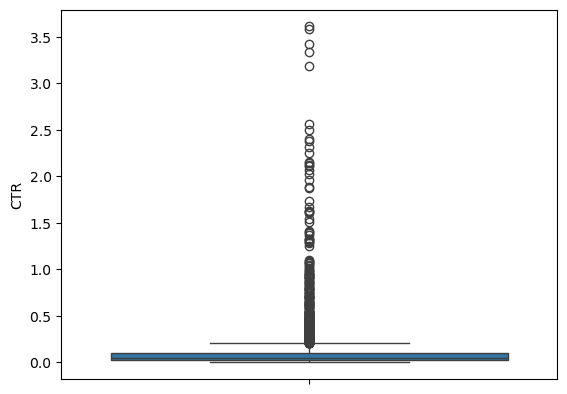

In [110]:
sns.boxplot(y_test)

In [111]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12864 entries, 100 to 3515
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Spend            12864 non-null  float64
 1   Impressions      12864 non-null  float64
 2   Clicks           12864 non-null  float64
 3   Conversions      12864 non-null  float64
 4   Campaign_Type    12864 non-null  int64  
 5   Region           12864 non-null  int64  
 6   Device_Type      12864 non-null  int64  
 7   Month            12864 non-null  int64  
 8   Conversion_Rate  12864 non-null  float64
 9   CPC              12864 non-null  float64
 10  CPM              12864 non-null  float64
 11  CPA              12864 non-null  float64
 12  Revenue          12864 non-null  float64
 13  ROI              12864 non-null  float64
dtypes: float64(10), int64(4)
memory usage: 1.5 MB


In [112]:
corr = x_train.corr()
corr

Spend  Impressions    Clicks  Conversions  Campaign_Type  \
Spend            1.000000    -0.000035 -0.003174     0.009314      -0.016484   
Impressions     -0.000035     1.000000  0.000416    -0.010034       0.008265   
Clicks          -0.003174     0.000416  1.000000    -0.005284       0.000629   
Conversions      0.009314    -0.010034 -0.005284     1.000000       0.009583   
Campaign_Type   -0.016484     0.008265  0.000629     0.009583       1.000000   
Region          -0.003142     0.021196  0.004485     0.005102      -0.008432   
Device_Type      0.007864     0.012366  0.009400    -0.015196       0.006552   
Month           -0.004425    -0.001988 -0.005806    -0.006647      -0.005237   
Conversion_Rate  0.004604    -0.003430 -0.709871     0.520464       0.002130   
CPC              0.483353    -0.003562 -0.727766     0.001498      -0.011257   
CPM              0.474194    -0.730523  0.002116     0.004013      -0.015283   
CPA              0.466960     0.004031 -0.004768    -0.730081      -0.018020   
Revenue          0.009306     0.003482 -0.010098     0.727241       0.008175   
ROI             -0.597165     0.005230 -0.006584     0.482649       0.019147   

                   Region  Device_Type     Month  Conversion_Rate       CPC  \
Spend           -0.003142     0.007864 -0.004425         0.004604  0.483353   
Impressions      0.021196     0.012366 -0.001988        -0.003430 -0.003562   
Clicks           0.004485     0.009400 -0.005806        -0.709871 -0.727766   
Conversions      0.005102    -0.015196 -0.006647         0.520464  0.001498   
Campaign_Type   -0.008432     0.006552 -0.005237         0.002130 -0.011257   
Region           1.000000    -0.010651  0.003994         0.000776 -0.005714   
Device_Type     -0.010651     1.000000 -0.007625        -0.013209  0.000914   
Month            0.003994    -0.007625  1.000000         0.003735  0.005714   
Conversion_Rate  0.000776    -0.013209  0.003735         1.000000  0.633142   
CPC             -0.005714     0.000914  0.005714         0.633142  1.000000   
CPM             -0.015742    -0.004220 -0.001450        -0.000762  0.248382   
CPA             -0.006777     0.013849  0.005750        -0.404361  0.250457   
Revenue          0.006579    -0.011263 -0.004864         0.384114  0.010600   
ROI              0.006472    -0.013972 -0.001064         0.261636 -0.324666   

                      CPM       CPA   Revenue       ROI  
Spend            0.474194  0.466960  0.009306 -0.597165  
Impressions     -0.730523  0.004031  0.003482  0.005230  
Clicks           0.002116 -0.004768 -0.010098 -0.006584  
Conversions      0.004013 -0.730081  0.727241  0.482649  
Campaign_Type   -0.015283 -0.018020  0.008175  0.019147  
Region          -0.015742 -0.006777  0.006579  0.006472  
Device_Type     -0.004220  0.013849 -0.011263 -0.013972  
Month           -0.001450  0.005750 -0.004864 -0.001064  
Conversion_Rate -0.000762 -0.404361  0.384114  0.261636  
CPC              0.248382  0.250457  0.010600 -0.324666  
CPM              1.000000  0.241349 -0.006655 -0.333211  
CPA              0.241349  1.000000 -0.527658 -0.667287  
Revenue         -0.006655 -0.527658  1.000000  0.614979  
ROI             -0.333211 -0.667287  0.614979  1.000000

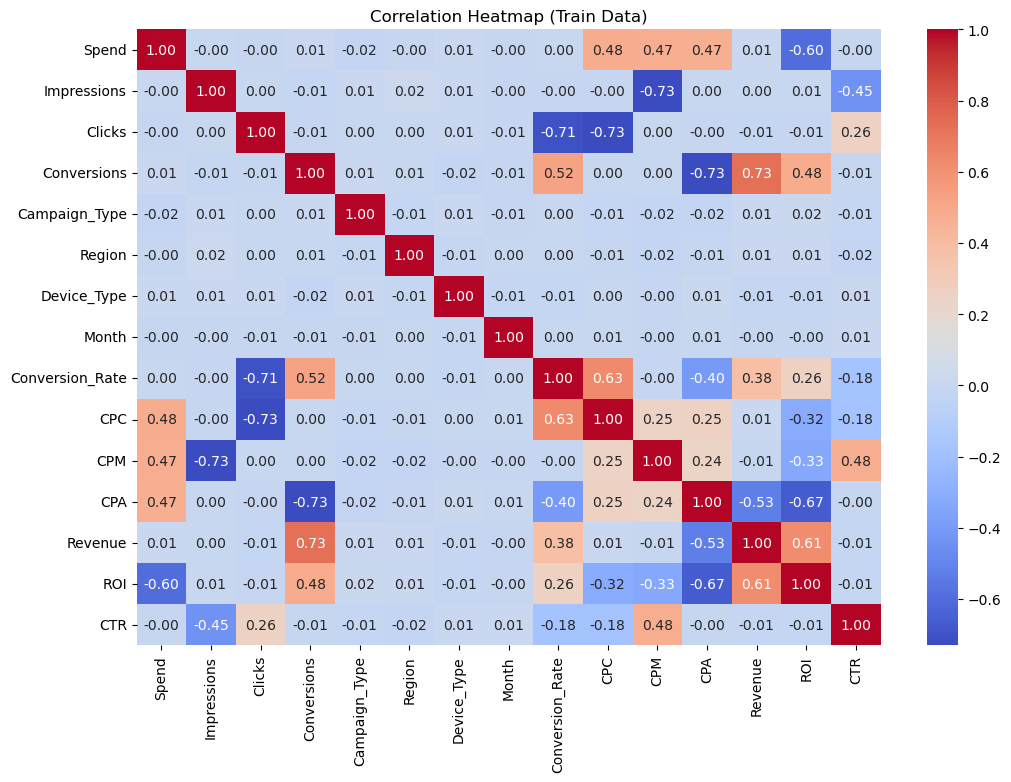

In [113]:
train_x_train = x_train.copy()
train_x_train['CTR'] = y_train

# Compute correlation matrixa
corr_matrix = train_x_train.corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap (Train Data)")
plt.show()

In [114]:
#the final feature set is
#[‘Impressions’, ‘Clicks’, ‘CPM’, ‘Conversion_Rate’, ‘Campaign_Type’, ‘Region’, ‘Device_Type’, ‘Month’]

In [115]:
x_train = x_train.drop(columns = ['Spend','Conversions','CPC','CPA','Revenue','ROI'])
x_test = x_test.drop(columns = ['Spend','Conversions','CPC','CPA','Revenue','ROI'])

In [159]:
model = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=8,
    min_samples_split=10,
    random_state=42
)

model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_split=10, random_state=42)

In [160]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# ---------- Train Predictions ----------
y_train_pred = model.predict(x_train)

mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
adj_r2_train = 1 - (((1 - r2_train) * (y_train.shape[0] - 1)) / (y_train.shape[0] - x_train.shape[1] - 1))

print("----- Training Performance -----")
print("Mean Squared Error (Train):", mse_train)
print("Root Mean Squared Error (Train):", rmse_train)
print("Mean Absolute Error (Train):", mae_train)
print("R-Squared Value (Train):", r2_train)
print("Adj-R-Squared Value (Train):", adj_r2_train)

# ---------- Test Predictions ----------
y_test_pred = model.predict(x_test)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
adj_r2_test = 1 - (((1 - r2_test) * (y_test.shape[0] - 1)) / (y_test.shape[0] - x_test.shape[1] - 1))

print("\n----- Testing Performance -----")
print("Mean Squared Error (Test):", mse_test)
print("Root Mean Squared Error (Test):", rmse_test)
print("Mean Absolute Error (Test):", mae_test)
print("R-Squared Value (Test):", r2_test)
print("Adj-R-Squared Value (Test):", adj_r2_test)


----- Training Performance -----
Mean Squared Error (Train): 0.0005952599517727032
Root Mean Squared Error (Train): 0.024397949745269647
Mean Absolute Error (Train): 0.009760094748600926
R-Squared Value (Train): 0.9920482915256
Adj-R-Squared Value (Train): 0.9920433429711235

----- Testing Performance -----
Mean Squared Error (Test): 0.00153398765049444
Root Mean Squared Error (Test): 0.039166154400125115
Mean Absolute Error (Test): 0.012760968002626931
R-Squared Value (Test): 0.9774061108586926
Adj-R-Squared Value (Test): 0.9773497494264722


Impressions  Clicks  Campaign_Type  Region  Device_Type  Month  \
100      35096.0  4040.0              1       2            3      9   

     Conversion_Rate         CPM  
100         0.049505  122.688461

In [161]:
project_data ={
    
    'Campaign_Type':{'LinkedIn':1,
    'Meta Ads':2, 
    'Display':3, 
    'Google Search':4, 
    'Email':5},
    
    'Device_Type':{'Desktop':1, 
    'Tablet':2,
    'Mobile':3},
    
    'Region':{"Australia" : 1,
    "Canada" : 2,
    "India" : 3,
    "UK" : 4,
    "US" : 5
        
    }
}

In [162]:
Impressions	= "17642"
Clicks = "3262"
Campaign_Type = "Display"
Region = "Canada"
Device_Type = "Desktop"
Month = '5'
Conversion_Rate	= "0.036174126302881665"
CPM	= "71.86556694282504"

In [163]:
test_array = np.zeros(x_train.shape[1])
test_array[0] = Impressions
test_array[1] = Clicks
# test_array[3] = Conversions
test_array[2] = project_data['Campaign_Type'][Campaign_Type]
test_array[3] = project_data['Region'][Region]
test_array[4] = project_data['Device_Type'][Device_Type]
test_array[5] = Month
test_array[6] = Conversion_Rate
test_array[7] = CPM


In [164]:
result = model.predict([test_array])[0]
print(f'Add Budget is : $. {result}')

Add Budget is : $. 0.15768271651565743


/opt/anaconda3/envs/linear_reg_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [166]:
def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != -2 else "undefined!"
        for i in tree_.feature
    ]
    
    def recurse(node, depth):
        indent = "    " * depth
        if tree_.feature[node] != -2:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print(f"{indent}if sample['{name}'] <= {threshold}:")
            recurse(tree_.children_left[node], depth + 1)
            print(f"{indent}else:") 
            recurse(tree_.children_right[node], depth + 1)
        else:
            print(f"{indent}return {tree_.value[node].tolist()}")
    
    print("def predict(sample):")
    recurse(0, 1)


In [168]:
tree_to_code(model, feature_names=['Impressions', 'Clicks', 'Campaign_Type', 'Region', 'Device_Type',
       'Month', 'Conversion_Rate', 'CPM'])


def predict(sample):
    if sample['Impressions'] <= 4454.5:
        if sample['Clicks'] <= 2658.0:
            if sample['Clicks'] <= 1417.0:
                if sample['Clicks'] <= 667.5:
                    if sample['Clicks'] <= 337.0:
                        if sample['Impressions'] <= 1714.5:
                            return [[0.176807034025249]]
                        else:
                            if sample['Clicks'] <= 224.0:
                                if sample['Device_Type'] <= 2.5:
                                    return [[0.06226899213269166]]
                                else:
                                    return [[0.03231225259020127]]
                            else:
                                return [[0.0850712521521644]]
                    else:
                        if sample['Impressions'] <= 2366.5:
                            if sample['Impressions'] <= 1300.0:
                                return [[0.3983363938146053]]
           

In [167]:
x_train.columns

Index(['Impressions', 'Clicks', 'Campaign_Type', 'Region', 'Device_Type',
       'Month', 'Conversion_Rate', 'CPM'],
      dtype='object')

In [171]:
sample = {
    "Impressions": 17642,
    "Clicks": 3262,
    "Campaign_Type": "Display",
    "Region": "Canada",
    "Device_Type": "Desktop",
    "Month": 5,
    "Conversion_Rate": 0.036174126302881665,
    "CPM": 71.86556694282504
}

result = predict(sample)
print("Predicted class:", result)


IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

In [172]:
import numpy as np

sample = {
    "Impressions": 17642,
    "Clicks": 3262,
    "Campaign_Type": 0,
    "Region": 0,
    "Device_Type": 0,
    "Month": 5,
    "Conversion_Rate": 0.036174126302881665,
    "CPM": 71.86556694282504
}

# Convert dict to feature array (same order as used during training)
x = np.array([
    sample["Impressions"],
    sample["Clicks"],
    sample["Campaign_Type"],
    sample["Region"],
    sample["Device_Type"],
    sample["Month"],
    sample["Conversion_Rate"],
    sample["CPM"]
])

# Wrap inside list because predict() expects a batch
result = predict([x])
print("Predicted class:", result)


Predicted class: [np.float64(0.1263112826139565)]


In [173]:
test_data.head(1)

Campaign_ID        Spend  Impressions  Clicks  Conversions  \
11866        17732  3034.936518      62248.0   853.0         36.0   

      Campaign_Type     Region Device_Type  Month       CTR  Conversion_Rate  \
11866      LinkedIn  Australia     Desktop      7  0.013703         0.042204   

            CPC        CPM       CPA      Revenue       ROI  
11866  3.557956  48.755567  84.30379  3584.222532  0.180988